In [195]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('diabetic_data.csv')

In [196]:
df.isnull().sum().sort_values(ascending=False)
print(df.shape)
print(df.columns.tolist())

(101766, 50)
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [197]:
df.drop(['weight', 'payer_code', 'max_glu_serum', 'encounter_id', 'patient_nbr', 'medical_specialty'], axis=1, inplace=True)
df.shape


(101766, 44)

In [198]:
# df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mean())
# df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mean())
# df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mean())

# # Count how many '?' are present in each column
# for col in ['diag_1', 'diag_2', 'diag_3']:
#     count_question = (df[col] == '?').sum()
#     print(f"{col} has {count_question} '?' values")


# Step 1: Replace '?' with NaN (taake missing values treat ho saken)
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].replace('?', np.nan)

# Step 2: Fill missing values with mode of that column
for col in ['diag_1', 'diag_2', 'diag_3']:
    mode_value = df[col].mode()[0]   # sabse frequent value
    df[col] = df[col].fillna(mode_value)
    print(f"{col} column filled with mode: {mode_value}")


diag_1 column filled with mode: 428
diag_2 column filled with mode: 276
diag_3 column filled with mode: 250


In [199]:
#proportional imputation for 'race' column




# Step 1: Replace '?' with NaN for consistency
df['race'] = df['race'].replace('?', np.nan)

# Step 2: Calculate proportions (excluding NaN)
proportions = df['race'].value_counts(normalize=True)

# Step 3: Find how many values are missing
n_missing = df['race'].isna().sum()
print(f"Missing values in 'race': {n_missing}")

# Step 4: Create a random sample based on proportions
imputed_values = np.random.choice(
    proportions.index,           # unique race categories
    size=n_missing,              # number of missing values
    p=proportions.values         # their probabilities
)

# Step 5: Fill missing values with sampled values
df.loc[df['race'].isna(), 'race'] = imputed_values

# ✅ Now all missing values are filled proportionally
print("Proportional mode imputation done for 'race' column.")
print(df['race'].value_counts())

# race_counts = df['race'].value_counts(dropna=False)

# print("Unique values in 'race' column with their counts:")
# print(race_counts)


Missing values in 'race': 2273
Proportional mode imputation done for 'race' column.
race
Caucasian          77811
AfricanAmerican    19670
Hispanic            2090
Other               1538
Asian                657
Name: count, dtype: int64


In [200]:
df.isnull().sum().sort_values(ascending=False)


A1Cresult                   84748
race                            0
age                             0
gender                          0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
admission_type_id               0
number_emergency                0
number_inpatient                0
diag_2                          0
diag_1                          0
diag_3                          0
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [201]:
# # Replace None and ? with "missing" in A1Cresult
# df['A1Cresult'] = df['A1Cresult'].replace(['None', '?'], 'missing')

# df['A1Cresult'].value_counts()

In [202]:
cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
        'num_medications', 'number_outpatient', 
        'number_emergency', 'number_inpatient', 'number_diagnoses']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


time_in_hospital: 2252 outliers
num_lab_procedures: 143 outliers
num_procedures: 4954 outliers
num_medications: 2557 outliers
number_outpatient: 16739 outliers
number_emergency: 11383 outliers
number_inpatient: 7049 outliers
number_diagnoses: 281 outliers


In [203]:
import pandas as pd

# Example: agar tumhara DataFrame "df" hai
# df = pd.read_csv("your_dataset.csv")

numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses']

# Dictionary to store outlier counts
outlier_summary = {}

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)    # 25th percentile
    Q3 = df[col].quantile(0.75)    # 75th percentile
    IQR = Q3 - Q1                  # Interquartile Range
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    
    # Store count of outliers
    outlier_summary[col] = len(outliers)

# Convert result to DataFrame for better readability
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier_Count'])

print("\n📊 Outlier Summary (using IQR method):")
print(outlier_df)



📊 Outlier Summary (using IQR method):
               Column  Outlier_Count
0    time_in_hospital           2252
1  num_lab_procedures            143
2      num_procedures           4954
3     num_medications           2557
4   number_outpatient          16739
5    number_emergency          11383
6    number_inpatient           7049
7    number_diagnoses            281


In [204]:
import pandas as pd

# Tumhara numeric columns list
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses']

# Ek copy le lo taake original df safe rahe
df_cleaned = df.copy()

# Loop through har numeric column
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filter sirf wo rows rakho jo outliers nahi hain
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_limit) & (df_cleaned[col] <= upper_limit)]

# Compare before vs after
print(f"Original rows: {len(df)}")
print(f"After outlier removal: {len(df_cleaned)}")
print(f"Rows removed: {len(df) - len(df_cleaned)}")


Original rows: 101766
After outlier removal: 66592
Rows removed: 35174


In [205]:
# List of all medicine-related columns
medicine_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed'
]

# Loop through each medicine column and print unique values + their counts
for col in medicine_cols:
    print(f"\n📦 Column: {col}")
    print(df_cleaned[col].value_counts(dropna=False))

print(df_cleaned.shape)
print(df_cleaned.columns.tolist())


📦 Column: metformin
metformin
No        53064
Steady    12393
Up          748
Down        387
Name: count, dtype: int64

📦 Column: repaglinide
repaglinide
No        65671
Steady      829
Up           68
Down         24
Name: count, dtype: int64

📦 Column: nateglinide
nateglinide
No        66161
Steady      405
Up           18
Down          8
Name: count, dtype: int64

📦 Column: chlorpropamide
chlorpropamide
No        66525
Steady       62
Up            4
Down          1
Name: count, dtype: int64

📦 Column: glimepiride
glimepiride
No        63183
Steady     3063
Up          219
Down        127
Name: count, dtype: int64

📦 Column: acetohexamide
acetohexamide
No    66592
Name: count, dtype: int64

📦 Column: glipizide
glipizide
No        58325
Steady     7423
Up          509
Down        335
Name: count, dtype: int64

📦 Column: glyburide
glyburide
No        59355
Steady     6314
Up          561
Down        362
Name: count, dtype: int64

📦 Column: tolbutamide
tolbutamide
No        66574
Ste

In [206]:
# Threshold for dominance (95%)
threshold = 0.95

# Columns jaha 95%+ values 'No' hain
mostly_no_cols = []

for col in ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
            'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
            'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide',
            'examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
            'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']:
    
    if (df_cleaned[col].value_counts(normalize=True).get('No', 0) > threshold):
        mostly_no_cols.append(col)

print("Columns with mostly 'No' values:")
print(mostly_no_cols)

# Drop them
df_cleaned = df_cleaned.drop(columns=mostly_no_cols)
print(f"\nDropped {len(mostly_no_cols)} columns.")
print(f"New shape: {df_cleaned.shape}")


Columns with mostly 'No' values:
['repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

Dropped 16 columns.
New shape: (66592, 28)


In [207]:
# from sklearn.preprocessing import LabelEncoder

# # Columns list (as you provided)
# cols_to_encode = [
#     'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
#     'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
#     'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
#     'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
#     'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
#     'metformin-pioglitazone', 'change', 'diabetesMed'
# ]

# # Create a copy to avoid overwriting
# df_encoded = df_cleaned.copy()

# # Initialize LabelEncoder
# le = LabelEncoder()

# # Loop through each column
# for col in cols_to_encode:
#     unique_vals = df_encoded[col].nunique()

#     # Binary encoding (for 2 unique values)
#     if unique_vals == 2:
#         df_encoded[col] = df_encoded[col].map({df_encoded[col].unique()[0]: 0,
#                                                df_encoded[col].unique()[1]: 1})
#         print(f"{col}: Binary encoded ✅")

#     # Label encoding (for more than 2 unique values)
#     else:
#         df_encoded[col] = le.fit_transform(df_encoded[col])
#         print(f"{col}: Label encoded 🔢")

# # Check encoded columns
# df_encoded[cols_to_encode].head()

df_cleaned.shape
df_cleaned.columns.tolist()


['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [208]:
from sklearn.preprocessing import LabelEncoder

# Only the columns that actually exist in df_cleaned
cols_to_encode = [
    'metformin', 'glimepiride', 'glipizide', 'glyburide',
    'pioglitazone', 'rosiglitazone', 'insulin',
    'change', 'diabetesMed'
]

df_encoded = df_cleaned.copy()
le = LabelEncoder()

for col in cols_to_encode:
    unique_vals = df_encoded[col].nunique()

    if unique_vals == 2:
        # Binary encoding (e.g., "No", "Steady" -> 0, 1)
        vals = df_encoded[col].unique()
        df_encoded[col] = df_encoded[col].map({vals[0]: 0, vals[1]: 1})
        print(f"{col}: Binary encoded ✅")
    else:
        # Label encoding for 3+ unique values
        df_encoded[col] = le.fit_transform(df_encoded[col])
        print(f"{col}: Label encoded 🔢")

print("\n✅ All medicine-related columns encoded successfully!")


metformin: Label encoded 🔢
glimepiride: Label encoded 🔢
glipizide: Label encoded 🔢
glyburide: Label encoded 🔢
pioglitazone: Label encoded 🔢
rosiglitazone: Label encoded 🔢
insulin: Label encoded 🔢
change: Binary encoded ✅
diabetesMed: Binary encoded ✅

✅ All medicine-related columns encoded successfully!


c:\Users\Muhammad Sami\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


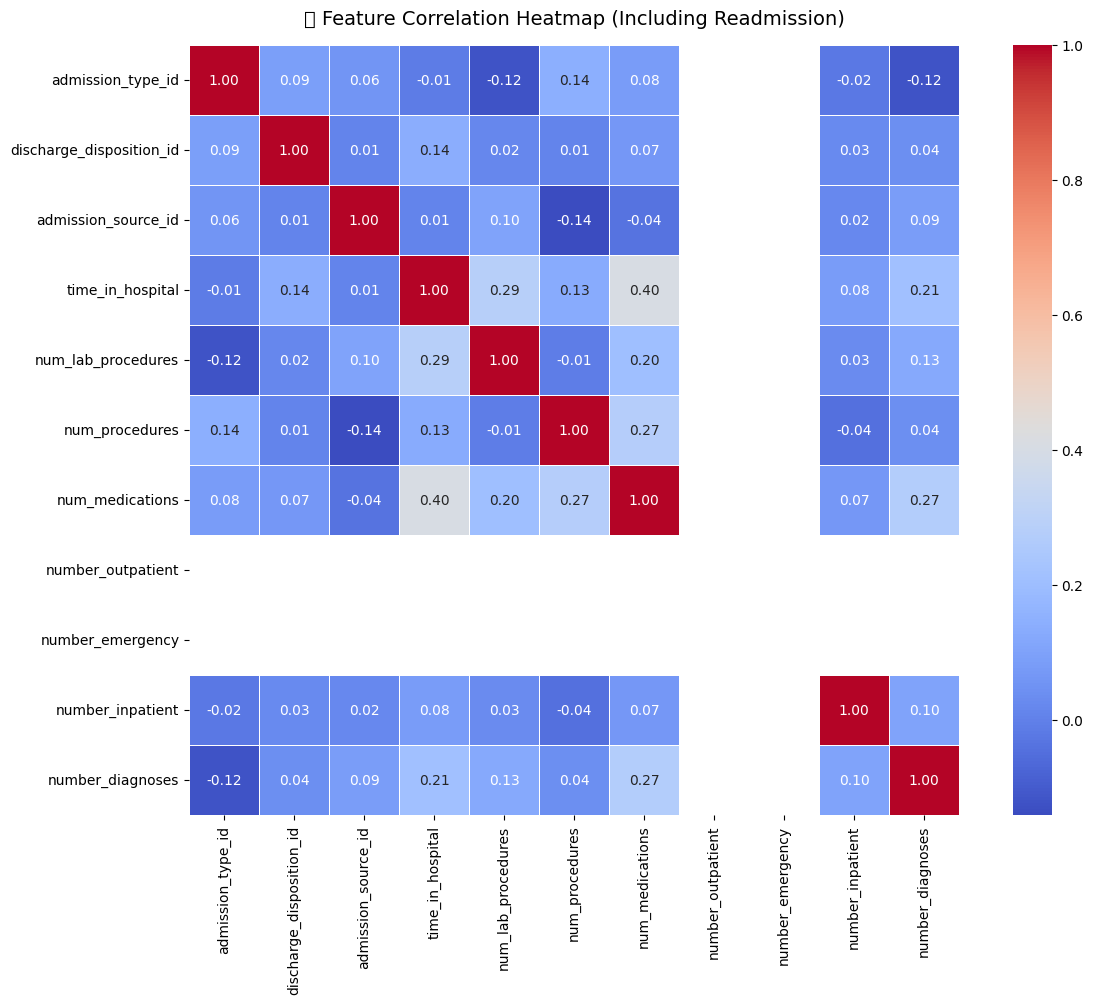

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# If not already encoded, ensure readmitted is numeric (optional)
# df_cleaned['readmitted'] = df_cleaned['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})

# Compute correlation matrix
corr = df_cleaned.corr(numeric_only=True)

# Set up the figure
plt.figure(figsize=(14, 10))

# Draw heatmap
sns.heatmap(
    corr,
    annot=True,          # Show values
    fmt=".2f",           # Format numbers
    cmap="coolwarm",     # Color palette
    linewidths=0.5,      # Line gaps
    square=True,
)

# Title
plt.title("📊 Feature Correlation Heatmap (Including Readmission)", fontsize=14, pad=15)

# Show plot
plt.show()
